# Data Prep

In [222]:
# импорт зависимосте

import pandas as pd
import numpy as np
import xarray as xr

import plotly

In [223]:
dt_hours: int = 6

In [224]:
df_v_ace = pd.read_parquet("Data/ace_at_earth_1h.parquet")
df_v_ace.sort_index(inplace=True)
# Apply 6-hour moving average smoothing
df_v_ace = df_v_ace.rolling(window=dt_hours, min_periods=1).mean()
df_v_ace

,speed,temperature,density
date,,,
2010-08-01 00:00:00,526.025000,81204.166667,0.720833
2010-08-01 01:00:00,523.527083,80682.083333,0.745000
2010-08-01 02:00:00,523.980278,84704.722222,0.780000
2010-08-01 03:00:00,525.173542,87112.291667,0.822708
2010-08-01 04:00:00,524.496167,94422.666667,0.855278
...,...,...,...
2023-12-31 16:00:00,299.760312,43598.741848,1.376988
2023-12-31 21:00:00,301.875287,38580.302893,1.625627
2023-12-31 22:00:00,304.186637,32072.724136,1.861382


In [225]:
cr_time = 27 * 24 * 3600  # s
omega = 360 / cr_time  # º/s

In [226]:
omega * 3600

0.5555555555555556

In [227]:
phi_step = 3600 * omega
phi_step

0.5555555555555556

In [228]:
r0 = 20
rSolar = 700000  # in meters

In [229]:
v_min = 300
a = 180
alpha = 0.6


def v(s):
    return v_min + a * (s * 100) ** alpha

In [230]:
# df_s = pd.read_parquet("Outputs/CH Areas 20160825-20170115.parquet")
# df_s = pd.read_parquet("Outputs/CH Areas 20140901-20141101.parquet")
df_s = pd.read_parquet("Outputs/CH Areas 20100101-20251231.parquet")
# Parse string index like 20100704_2356 -> datetime, inplace
df_s.index = pd.to_datetime(
    df_s.index.astype(str).str.strip(),
    format="%Y%m%d_%H%M",
    errors="coerce",
)

df_s

,fits_path,mask_path,s_idl,s_a1d1,s_a2d1,s_a2d2
key,,,,,,
2010-07-04 05:52:00,/home/smdc/mnt~sun/FITS/2010/07/04/AIA20100704...,/home/smdc/mnt~sun/Masks/2010/07/AIA20100704_0...,0.000000,0.000000,0.000080,0.000120
2010-07-04 11:52:00,/home/smdc/mnt~sun/FITS/2010/07/04/AIA20100704...,/home/smdc/mnt~sun/Masks/2010/07/AIA20100704_1...,0.000000,0.000794,0.001373,0.000378
2010-07-04 17:52:00,/home/smdc/mnt~sun/FITS/2010/07/04/AIA20100704...,/home/smdc/mnt~sun/Masks/2010/07/AIA20100704_1...,0.002438,0.001592,0.003023,0.002804
2010-07-04 23:56:00,/home/smdc/mnt~sun/FITS/2010/07/04/AIA20100704...,/home/smdc/mnt~sun/Masks/2010/07/AIA20100704_2...,0.002240,0.002395,0.002920,0.002947
2010-07-05 05:52:00,/home/smdc/mnt~sun/FITS/2010/07/05/AIA20100705...,/home/smdc/mnt~sun/Masks/2010/07/AIA20100705_0...,0.000000,0.000276,0.002516,0.001901
...,...,...,...,...,...,...
2024-04-08 18:00:00,/home/smdc/mnt~sun/FITS/2024/04/08/AIA20240408...,/home/smdc/mnt~sun/Masks/2024/04/AIA20240408_1...,0.024680,0.022129,0.027571,0.027219
2024-04-09 00:00:00,/home/smdc/mnt~sun/FITS/2024/04/09/AIA20240409...,/home/smdc/mnt~sun/Masks/2024/04/AIA20240409_0...,0.021997,0.020471,0.023292,0.023374
2024-04-09 06:00:00,/home/smdc/mnt~sun/FITS/2024/04/09/AIA20240409...,/home/smdc/mnt~sun/Masks/2024/04/AIA20240409_0...,0.019521,0.017816,0.020199,0.020188


In [231]:
# df_s = df_s.sort_index()["2016-11-01":"2016-12-17"]

In [232]:
# v(s) must be defined
# df has columns like s_XXX
for col in [c for c in df_s.columns if c.startswith("s_")]:
    out_col = "v_" + col[2:]
    df_s[out_col] = df_s[col].astype(float).apply(v)

In [233]:
# Propagate each v_XXX series to Earth and combine into a new df
R_target = 214  # in R_solar units
distance = R_target * rSolar  # km (assuming rSolar in km)

In [234]:
v_cols = [c for c in df_s.columns if c.startswith("v_")]

In [235]:
prop_df = pd.DataFrame(index=pd.DatetimeIndex([], name="time"))

In [236]:
for col in v_cols:
    series = df_s[col].astype(float).replace([np.inf, -np.inf], np.nan).dropna()
    series = series[series > 0]
    if series.empty:
        prop_df[col] = pd.Series(index=prop_df.index, dtype=float)
        continue

    t0 = series.index
    vvals = series.values
    dt_sec = distance / vvals
    # set to 6h for global dataframe
    t_arr = (t0 + pd.to_timedelta(dt_sec, unit="s")).round(str(dt_hours) + "h")

    # if collisions, keep faster v
    tmp = pd.DataFrame({"t": t_arr, "v": vvals})
    out = tmp.groupby("t")["v"].max().sort_index()

    prop_df = prop_df.join(out.rename(col), how="outer")

In [237]:
prop_df_smooth = prop_df.interpolate(method="pad")
prop_df_smooth

,v_idl,v_a1d1,v_a2d1,v_a2d2
t,,,,
2010-05-16 06:00:00,531.185296,526.507902,546.454966,541.307046
2010-05-16 12:00:00,531.185296,526.507902,518.447556,541.307046
2010-05-16 18:00:00,502.758730,497.345019,518.447556,510.876277
2010-05-17 00:00:00,480.274718,497.345019,486.053203,480.729724
2010-05-17 06:00:00,480.274718,458.027998,486.053203,480.729724
...,...,...,...,...
2024-04-13 12:00:00,539.740811,499.240582,535.157347,515.192714
2024-04-13 18:00:00,513.206344,478.815727,516.363826,517.683111
2024-04-14 00:00:00,511.624960,511.532689,516.363826,517.683111


In [238]:
e1 = ["2016-08-29", "2017-01-12"]
e2 = ["2017-04-01", "2017-07-01"]

In [239]:
# Load ICME events and create prop_df without ICME-covered periods
icme_df = pd.read_csv("Data/merged_icme_short.csv")

# Use T_shock if available, else T_start; use T_end
icme_df["start"] = icme_df["T_shock"].fillna(icme_df["T_start"])
icme_df["end"] = icme_df["T_end"]

# Convert to datetime
icme_df["start"] = pd.to_datetime(icme_df["start"], errors="coerce")
icme_df["end"] = pd.to_datetime(icme_df["end"], errors="coerce")

# Drop rows with missing start or end
icme_df = icme_df.dropna(subset=["start", "end"])

print(f"Loaded {len(icme_df)} ICME events")
print(f"ICME period: {icme_df['start'].min()} to {icme_df['end'].max()}")

# Create mask: mark all rows in prop_df that fall within any ICME window
mask_icme = pd.Series(False, index=prop_df_smooth.index)
for _, row in icme_df.iterrows():
    mask_icme |= (prop_df_smooth.index >= row["start"]) & (
        prop_df_smooth.index <= row["end"]
    )

# Preserve timestamps and blank values during ICME periods
prop_df_no_icme = prop_df_smooth.copy()
prop_df_no_icme.loc[mask_icme, :] = np.nan

print(f"\nOriginal prop_df: {len(prop_df_smooth)} rows")
print(f"Rows blanked by ICME filter: {mask_icme.sum()}")
print(f"prop_df_no_icme: {len(prop_df_no_icme)} rows")

Loaded 623 ICME events
ICME period: 2010-01-01 22:00:00 to 2025-01-03 22:00:00

Original prop_df: 17741 rows
Rows blanked by ICME filter: 2101
prop_df_no_icme: 17741 rows


In [240]:
df = prop_df_no_icme
df = df.join(
    df_v_ace[["speed"]].rename(columns={"speed": "v_ace_at_earth"}), how="left"
)

In [241]:
mask_cols = [c for c in df.columns if c != "v_ace_at_earth"]
df = df.loc[~(df[mask_cols] == 300).any(axis=1)]
# df = df[e1[0] : e1[1]]

# Stats

In [243]:
from dtaidistance import dtw
from scipy.stats import zscore
import warnings, textwrap

warnings.filterwarnings("ignore")

# ── 1) Cadence ────────────────────────────────────────────────────────
dtw_band_hours: int = 24  # Sakoe–Chiba band width in hours


def hours_to_bins(h: int) -> int:
    return int(round(h / dt_hours))


def bins_to_hours(b: int) -> float:
    return b * dt_hours


dtw_band_bins = hours_to_bins(dtw_band_hours)

# ── 2) Prepare data ──────────────────────────────────────────────────
target = "v_ace_at_earth"
v_cols = [c for c in df.columns if c.startswith("v_") and c != target]

# For BASIC stats (RMSE, MAE, bias, r): use ORIGINAL unbinned data
df_unbinned = df[[target] + v_cols].copy()

# For DTW metrics: resample to evaluation cadence
resample_rule = f"{dt_hours}h"
eval_df = df[[target] + v_cols].resample(resample_rule).mean()

# Verify cadence
dt_median_hours = eval_df.index.to_series().diff().median().total_seconds() / 3600
assert (
    abs(dt_median_hours - dt_hours) < 0.5
), f"Cadence check failed: median dt = {dt_median_hours:.2f} h, expected {dt_hours} h"

# ── 3) Compute metrics ────────────────────────────────────────────────
all_stats = {}

for col in v_cols:
    # ── BASIC STATS: compute on UNBINNED data ──────────────────────────
    pair_unbinned = df_unbinned[[col, target]].dropna()
    if pair_unbinned.empty or len(pair_unbinned) < 2:
        continue

    pair_unbinned = pair_unbinned.sort_index()
    x_unbinned = pair_unbinned[col].astype(float).values
    y_unbinned = pair_unbinned[target].astype(float).values

    diff = x_unbinned - y_unbinned
    rmse = float(np.sqrt(np.mean(diff**2)))
    mae = float(np.mean(np.abs(diff)))
    bias = float(np.mean(diff))
    pearson_r = (
        float(np.corrcoef(x_unbinned, y_unbinned)[0, 1])
        if np.std(x_unbinned) > 0 and np.std(y_unbinned) > 0
        else np.nan
    )

    n_total = len(pair_unbinned)

    # ── dv/dt STATS: compute derivatives on UNBINNED data ──────────────
    # Compute time differences in hours
    dt_hours_array = (
        pair_unbinned.index.to_series().diff().dt.total_seconds().values / 3600
    )
    dx = np.diff(x_unbinned)
    dy = np.diff(y_unbinned)
    dt = dt_hours_array[1:]
    valid = np.isfinite(dt) & (dt > 0) & np.isfinite(dx) & np.isfinite(dy)

    if np.any(valid):
        dv_pred = dx[valid] / dt[valid]
        dv_obs = dy[valid] / dt[valid]
        dv_diff = dv_pred - dv_obs
        rmse_dvdt = float(np.sqrt(np.mean(dv_diff**2))) if len(dv_diff) > 0 else np.nan
        corr_dvdt = (
            float(np.corrcoef(dv_pred, dv_obs)[0, 1])
            if len(dv_pred) > 1 and np.std(dv_pred) > 0 and np.std(dv_obs) > 0
            else np.nan
        )
    else:
        rmse_dvdt = np.nan
        corr_dvdt = np.nan

    # ── DTW METRICS: compute on BINNED data ────────────────────────────
    mask = eval_df[col].notna() & eval_df[target].notna()
    x = eval_df.loc[mask, col].astype(float).values  # prediction (bins)
    y = eval_df.loc[mask, target].astype(float).values  # ACE truth  (bins)
    n_used = int(mask.sum())

    if n_used < 2:
        continue

    # ── DTW (z-scored, Sakoe–Chiba band in bins) ──────────────────────
    sx, sy = np.std(x), np.std(y)
    if sx > 0 and sy > 0:
        xz = (x - np.mean(x)) / sx
        yz = (y - np.mean(y)) / sy
        try:
            dtw_distance = dtw.distance(
                xz,
                yz,
                window=dtw_band_bins,  # ← bins, not hours
                use_pruning=True,
            )
            dtw_normalized = dtw_distance / len(xz)
        except Exception:
            dtw_distance = dtw_normalized = np.nan
    else:
        xz = yz = None
        dtw_distance = dtw_normalized = np.nan

    # ── Optional warping-path lag stats ────────────────────────────────
    dtw_mean_abs_lag_h = np.nan
    dtw_median_abs_lag_h = np.nan
    if xz is not None:
        try:
            warping_path = dtw.warping_path(
                xz,
                yz,
                window=dtw_band_bins,
            )
            path_lags_bins = np.array([i - j for i, j in warping_path])
            path_lags_hours = path_lags_bins * dt_hours  # bins → hours
            dtw_mean_abs_lag_h = float(np.mean(np.abs(path_lags_hours)))
            dtw_median_abs_lag_h = float(np.median(np.abs(path_lags_hours)))
        except Exception:
            pass  # warping_path not available – leave NaN

    # ── Store row ──────────────────────────────────────────────────────
    all_stats[col] = {
        "n_unbinned": n_total,
        "n_binned": n_used,
        "fraction_used": round(n_used / n_total, 4) if n_total > 0 else 0.0,
        "rmse": rmse,
        "mae": mae,
        "bias": bias,
        "pearson_r": pearson_r,
        "rmse_dvdt": rmse_dvdt,
        "corr_dvdt": corr_dvdt,
        "dtw_distance": dtw_distance,
        "dtw_normalized": dtw_normalized,
        "dtw_band_hours": dtw_band_hours,
        "dtw_band_bins": dtw_band_bins,
        "dtw_mean_abs_lag_h": dtw_mean_abs_lag_h,
        "dtw_median_abs_lag_h": dtw_median_abs_lag_h,
    }

metrics_v2 = pd.DataFrame(all_stats).T
metrics_v2.index.name = "series"

# ── Mandatory correctness checks ──────────────────────────────────────
print("=== CORRECTNESS CHECKS ===\n")

# Cadence
print(f"[✓] Cadence: median Δt = {dt_median_hours:.2f} h  (expected {dt_hours} h)")

# Bin/hour conversion
assert dtw_band_bins == round(dtw_band_hours / dt_hours), "Bin/hour conversion mismatch"
print(f"[✓] DTW band: {dtw_band_hours} h = {dtw_band_bins} bins  (dt={dt_hours} h)")

# Pick one column for quick sanity tests
_test_col = v_cols[0]
_mask = eval_df[_test_col].notna() & eval_df[target].notna()
_ace = eval_df.loc[_mask, target].astype(float).values

# Identity test: pred = ace (on binned data)
_id_rmse = float(np.sqrt(np.mean((_ace - _ace) ** 2)))
_id_r = float(np.corrcoef(_ace, _ace)[0, 1]) if np.std(_ace) > 0 else np.nan
_az = (_ace - np.mean(_ace)) / np.std(_ace) if np.std(_ace) > 0 else _ace
_id_dtw = dtw.distance(_az, _az, window=dtw_band_bins, use_pruning=True)
ok = _id_rmse == 0 and (np.isnan(_id_r) or abs(_id_r - 1.0) < 1e-10) and _id_dtw == 0
print(f"[{'✓' if ok else '✗'}] Identity:  RMSE={_id_rmse}, r={_id_r}, DTW={_id_dtw}")

# Constant bias test: pred = ace + 50
_bias_pred = _ace + 50
_b_rmse = float(np.sqrt(np.mean((_bias_pred - _ace) ** 2)))
_b_bias = float(np.mean(_bias_pred - _ace))
_b_r = float(np.corrcoef(_bias_pred, _ace)[0, 1]) if np.std(_ace) > 0 else np.nan
_bz = (_bias_pred - np.mean(_bias_pred)) / np.std(_bias_pred)
_b_dtw = dtw.distance(_bz, _az, window=dtw_band_bins, use_pruning=True)
ok = (
    abs(_b_rmse - 50) < 0.1
    and abs(_b_bias - 50) < 0.1
    and (np.isnan(_b_r) or abs(_b_r - 1.0) < 1e-10)
    and _b_dtw < 1e-6
)
print(
    f"[{'✓' if ok else '✗'}] Bias +50:  RMSE={_b_rmse:.2f}, bias={_b_bias:.2f}, r={_b_r:.6f}, DTW(z)={_b_dtw:.6f}"
)

# Shift test: pred = ace shifted by +1 bin
_shifted = np.roll(_ace, 1)
_shifted[0] = _ace[0]
_s_rmse = float(np.sqrt(np.mean((_shifted - _ace) ** 2)))
_s_r = float(np.corrcoef(_shifted, _ace)[0, 1]) if np.std(_ace) > 0 else np.nan
_sz = (
    (_shifted - np.mean(_shifted)) / np.std(_shifted)
    if np.std(_shifted) > 0
    else _shifted
)
_s_dtw = dtw.distance(_sz, _az, window=dtw_band_bins, use_pruning=True)
ok = _s_rmse > 0 and (np.isnan(_s_r) or _s_r < 1.0) and _s_dtw > 0
print(
    f"[{'✓' if ok else '✗'}] Shift +1b: RMSE={_s_rmse:.2f}, r={_s_r:.6f}, DTW(z)={_s_dtw:.4f}  (all > 0)"
)

print(f"\n=== METRICS ({len(metrics_v2)} series × {len(metrics_v2.columns)} cols) ===")
print(
    "Note: RMSE/MAE/bias/r/dv_dt computed on unbinned data; DTW metrics on binned data"
)
metrics_v2


=== CORRECTNESS CHECKS ===

[✓] Cadence: median Δt = 6.00 h  (expected 6 h)
[✓] DTW band: 24 h = 4 bins  (dt=6 h)
[✓] Identity:  RMSE=0.0, r=0.9999999999999999, DTW=0.0
[✗] Bias +50:  RMSE=50.00, bias=50.00, r=1.000000, DTW(z)=inf
[✓] Shift +1b: RMSE=38.98, r=0.911647, DTW(z)=0.0575  (all > 0)

=== METRICS (4 series × 15 cols) ===
Note: RMSE/MAE/bias/r/dv_dt computed on unbinned data; DTW metrics on binned data


,n_unbinned,n_binned,fraction_used,rmse,mae,bias,pearson_r,rmse_dvdt,corr_dvdt,dtw_distance,dtw_normalized,dtw_band_hours,dtw_band_bins,dtw_mean_abs_lag_h,dtw_median_abs_lag_h
series,,,,,,,,,,,,,,,
v_idl,10351.0,10347.0,0.9996,116.794013,91.037346,47.512245,0.369073,7.512074,0.074493,91.927728,0.008884,24.0,4.0,12.159616,12.0
v_a1d1,10351.0,10347.0,0.9996,119.723698,93.228618,49.989969,0.354601,7.421404,0.063722,93.652768,0.009051,24.0,4.0,12.441232,12.0
v_a2d1,10351.0,10347.0,0.9996,113.893050,88.959094,43.931945,0.374684,7.003308,0.078076,91.115177,0.008806,24.0,4.0,12.187834,12.0
v_a2d2,10351.0,10347.0,0.9996,118.505004,92.420998,50.370993,0.366829,7.107398,0.081192,92.192738,0.008910,24.0,4.0,12.249337,12.0


In [204]:
"""
Event-based onset lag analysis.

Detects HSS events (v > threshold for ≥ duration) and measures timing offset
between predicted and observed onsets.
"""

from scipy.stats import iqr

# ── Event detection parameters ───────────────────────────────────────
v_threshold = 500  # km/s
duration_hours = 12  # minimum event duration
tolerance_hours = 24  # matching window: ±tolerance

duration_bins = hours_to_bins(duration_hours)
tolerance_bins = hours_to_bins(tolerance_hours)


def detect_onsets(series: pd.Series, threshold: float, min_duration_bins: int) -> list:
    """
    Detect HSS event onset times.

    Returns list of datetime indices where v exceeds threshold for ≥ min_duration_bins.
    """
    above = series > threshold
    onsets = []

    i = 0
    while i < len(above):
        if above.iloc[i]:
            # Found potential onset
            onset_time = series.index[i]

            # Check if event lasts min_duration_bins
            j = i
            while j < len(above) and above.iloc[j]:
                j += 1

            event_duration = j - i
            if event_duration >= min_duration_bins:
                onsets.append(onset_time)
                i = j  # Skip to end of this event
            else:
                i += 1
        else:
            i += 1

    return onsets


def match_onsets(
    pred_onsets: list, ace_onsets: list, tolerance_bins: int, dt_hours: int
) -> tuple:
    """
    Match predicted onsets to ACE onsets within tolerance window.

    Returns:
        matched_lags_bins: list of lags in bins (pred - ace)
        n_pred: total predicted events
        n_ace: total ACE events
        n_matched: successfully matched events
    """
    matched_lags_bins = []
    matched_ace = set()

    for pred_t in pred_onsets:
        best_match = None
        best_lag = None

        for ace_t in ace_onsets:
            if ace_t in matched_ace:
                continue

            lag_timedelta = pred_t - ace_t
            lag_bins = int(round(lag_timedelta.total_seconds() / 3600 / dt_hours))

            if abs(lag_bins) <= tolerance_bins:
                if best_match is None or abs(lag_bins) < abs(best_lag):
                    best_match = ace_t
                    best_lag = lag_bins

        if best_match is not None:
            matched_lags_bins.append(best_lag)
            matched_ace.add(best_match)

    return matched_lags_bins, len(pred_onsets), len(ace_onsets), len(matched_lags_bins)


# ── Detect ACE events ─────────────────────────────────────────────────
ace_series = eval_df[target].dropna()
ace_onsets = detect_onsets(ace_series, v_threshold, duration_bins)

print(f"=== EVENT-BASED ONSET LAG ANALYSIS ===\n")
print(f"Detection: v > {v_threshold} km/s for ≥ {duration_hours} h")
print(f"Tolerance: ±{tolerance_hours} h")
print(f"ACE events detected: {len(ace_onsets)}")
print(f"Period: {eval_df.index.min()} to {eval_df.index.max()}\n")

# ── Compute onset lags for each prediction ────────────────────────────
onset_stats = {}

for col in v_cols:
    pred_series = eval_df[col].dropna()
    pred_onsets = detect_onsets(pred_series, v_threshold, duration_bins)

    if len(pred_onsets) == 0:
        continue

    matched_lags_bins, n_pred, n_ace, n_matched = match_onsets(
        pred_onsets, ace_onsets, tolerance_bins, dt_hours
    )

    if len(matched_lags_bins) > 0:
        matched_lags_hours = np.array(matched_lags_bins) * dt_hours

        onset_stats[col] = {
            "onset_n_ace": n_ace,
            "onset_n_pred": n_pred,
            "onset_n_matched": n_matched,
            "onset_match_rate": round(n_matched / n_ace, 3) if n_ace > 0 else 0.0,
            "onset_median_lag_h": float(np.median(matched_lags_hours)),
            "onset_median_abs_lag_h": float(np.median(np.abs(matched_lags_hours))),
            "onset_iqr_abs_lag_h": float(iqr(np.abs(matched_lags_hours))),
            "onset_min_lag_h": float(np.min(matched_lags_hours)),
            "onset_max_lag_h": float(np.max(matched_lags_hours)),
        }
    else:
        onset_stats[col] = {
            "onset_n_ace": n_ace,
            "onset_n_pred": n_pred,
            "onset_n_matched": 0,
            "onset_match_rate": 0.0,
            "onset_median_lag_h": np.nan,
            "onset_median_abs_lag_h": np.nan,
            "onset_iqr_abs_lag_h": np.nan,
            "onset_min_lag_h": np.nan,
            "onset_max_lag_h": np.nan,
        }

onset_df = pd.DataFrame(onset_stats).T
onset_df.index.name = "series"

# ── Merge with existing metrics ───────────────────────────────────────
print(onset_df)

=== EVENT-BASED ONSET LAG ANALYSIS ===

Detection: v > 500 km/s for ≥ 12 h
Tolerance: ±24 h
ACE events detected: 379
Period: 2010-05-16 06:00:00 to 2024-04-14 12:00:00

        onset_n_ace  onset_n_pred  onset_n_matched  onset_match_rate  \
series                                                                 
v_idl         379.0         464.0            152.0             0.401   
v_a1d1        379.0         452.0            148.0             0.391   
v_a2d1        379.0         447.0            146.0             0.385   
v_a2d2        379.0         443.0            138.0             0.364   

        onset_median_lag_h  onset_median_abs_lag_h  onset_iqr_abs_lag_h  \
series                                                                    
v_idl                 -6.0                    12.0                 12.0   
v_a1d1                -6.0                    12.0                 12.0   
v_a2d1                 0.0                     6.0                 12.0   
v_a2d2                -

In [205]:
"""
Save metrics and onset stats to Excel file.
Sheet name = time resolution (e.g., "1h", "6h").
Overwrites existing sheets with the same name.
"""

from pathlib import Path
from openpyxl import load_workbook

# Create output directory if needed
out_dir = Path("Outputs")
out_dir.mkdir(parents=True, exist_ok=True)

out_file = out_dir / "Paper Stats.xlsx"
sheet_name = f"{dt_hours}h"

# Prepare data: metrics_v2 + onset_df side-by-side (with some spacing)
combined = metrics_v2.copy()
# Add onset stats with a gap column
combined[None] = None  # Spacer column
for col in onset_df.columns:
    combined[f"onset_{col}"] = onset_df[col]

# Write to Excel: overwrite sheet if it exists, append otherwise
if out_file.exists():
    # Append mode with sheet replacement
    with pd.ExcelWriter(
        out_file, engine="openpyxl", mode="a", if_sheet_exists="replace"
    ) as writer:
        combined.to_excel(writer, sheet_name=sheet_name)
    print(f"Updated sheet '{sheet_name}' in {out_file}")
else:
    # Create new file
    with pd.ExcelWriter(out_file, engine="openpyxl") as writer:
        combined.to_excel(writer, sheet_name=sheet_name)
    print(f"Created {out_file} with sheet '{sheet_name}'")

print(f"\nSaved {len(combined)} rows × {len(combined.columns)} columns")
print(f"Available sheets: {list(load_workbook(out_file).sheetnames)}")

Updated sheet '6h' in Outputs/Paper Stats.xlsx

Saved 4 rows × 25 columns
Available sheets: ['1h', '6h']


In [206]:
# Define color palette for plotting
import seaborn as sns

palette = sns.color_palette("tab10", 10)

# Plots

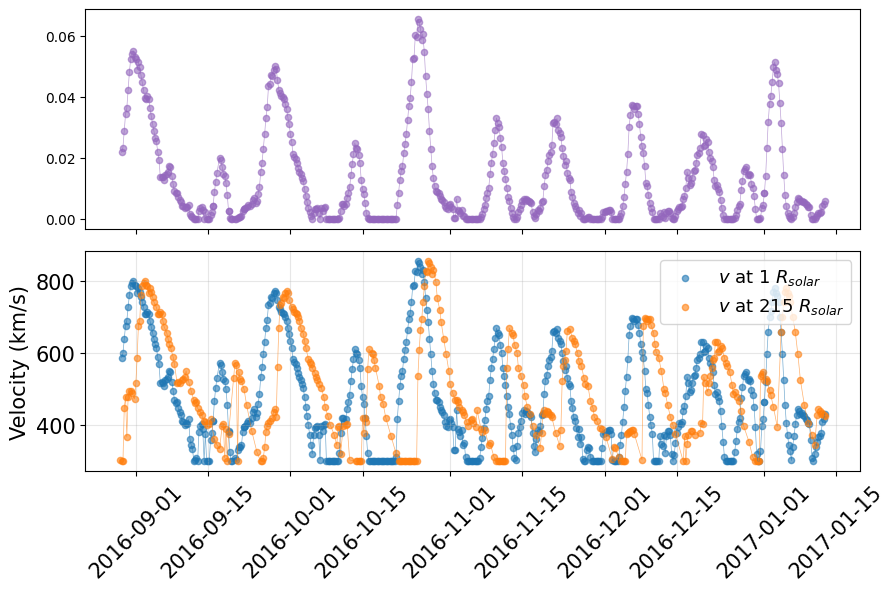

In [207]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(10, 6), sharex=True, gridspec_kw={"hspace": 0.1}
)

# ====================================================
# TOP PANEL: CH Area
# ====================================================
if "s_a2d2" in df_s.columns:
    df_s_dt = df_s.copy()
    df_s_dt.index = pd.to_datetime(df_s_dt.index)
    df_s_dt = df_s_dt.sort_index()
    df_s_period = df_s_dt[e1[0] : e1[1]].sort_index()
    df_s_clean = df_s_period.dropna(subset=["s_a2d2"])
    ax1.plot(
        df_s_clean.index, df_s_clean["s_a2d2"], linewidth=0.5, alpha=0.6, color="C4"
    )
    ax1.scatter(
        df_s_period.index,
        df_s_period["s_a2d2"],
        alpha=0.6,
        s=20,
        color="C4",
        label="Area at $1\ R_{solar}$",
    )

# ====================================================
# BOTTOM PANEL: Velocity
# ====================================================
# Plot df_s.v_a2d2 (source)
if "v_a2d2" in df_s.columns:
    df_s_dt = df_s.copy()
    df_s_dt.index = pd.to_datetime(df_s_dt.index)
    df_s_dt = df_s_dt.sort_index()
    df_s_period = df_s_dt[e1[0] : e1[1]].sort_index()
    df_s_clean = df_s_period.dropna(subset=["v_a2d2"])
    ax2.plot(
        df_s_clean.index, df_s_clean["v_a2d2"], linewidth=0.5, alpha=0.6, color="C0"
    )
    ax2.scatter(
        df_s_period.index,
        df_s_period["v_a2d2"],
        alpha=0.6,
        s=20,
        label="$v$ at $1\ R_{solar}$",
    )

# Plot prop_df.v_a2d2 (propagated)
if "v_a2d2" in prop_df.columns:
    prop_df_dt = prop_df.copy()
    prop_df_dt.index = pd.to_datetime(prop_df_dt.index)
    prop_df_dt = prop_df_dt.sort_index()
    prop_df_period = prop_df_dt[e1[0] : e1[1]].sort_index()
    prop_df_clean = prop_df_period.dropna(subset=["v_a2d2"])
    ax2.plot(
        prop_df_clean.index,
        prop_df_clean["v_a2d2"],
        linewidth=0.5,
        alpha=0.6,
        color="C1",
    )
    ax2.scatter(
        prop_df_period.index,
        prop_df_period["v_a2d2"],
        alpha=0.6,
        s=20,
        label="$v$ at $215\ R_{solar}$",
    )

# # ====================================================
# # ICME windows (red rectangles)
# # ====================================================
# for _, row in icme_df.iterrows():
#     if pd.isna(row["start"]) or pd.isna(row["end"]):
#         continue
#     ax1.axvspan(row["start"], row["end"], color="red", alpha=0.08, zorder=-5)
#     ax2.axvspan(row["start"], row["end"], color="red", alpha=0.08, zorder=-5)

# ax1.set_ylabel("CH Area (fraction)", fontsize=15)
# ax1.tick_params(axis="both", labelsize=15)
# ax1.legend(loc="upper right", fontsize=13)
# ax1.grid(True, alpha=0.3)

ax2.set_ylabel("Velocity (km/s)", fontsize=15)
ax2.tick_params(axis="both", labelsize=15)
ax2.legend(loc="upper right", fontsize=13)
ax2.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14117 entries, 2010-05-16 06:00:00 to 2024-04-14 12:00:00
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   v_idl           12015 non-null  float64
 1   v_a1d1          12015 non-null  float64
 2   v_a2d1          12015 non-null  float64
 3   v_a2d2          12015 non-null  float64
 4   v_ace_at_earth  12216 non-null  float64
dtypes: float64(5)
memory usage: 661.7 KB


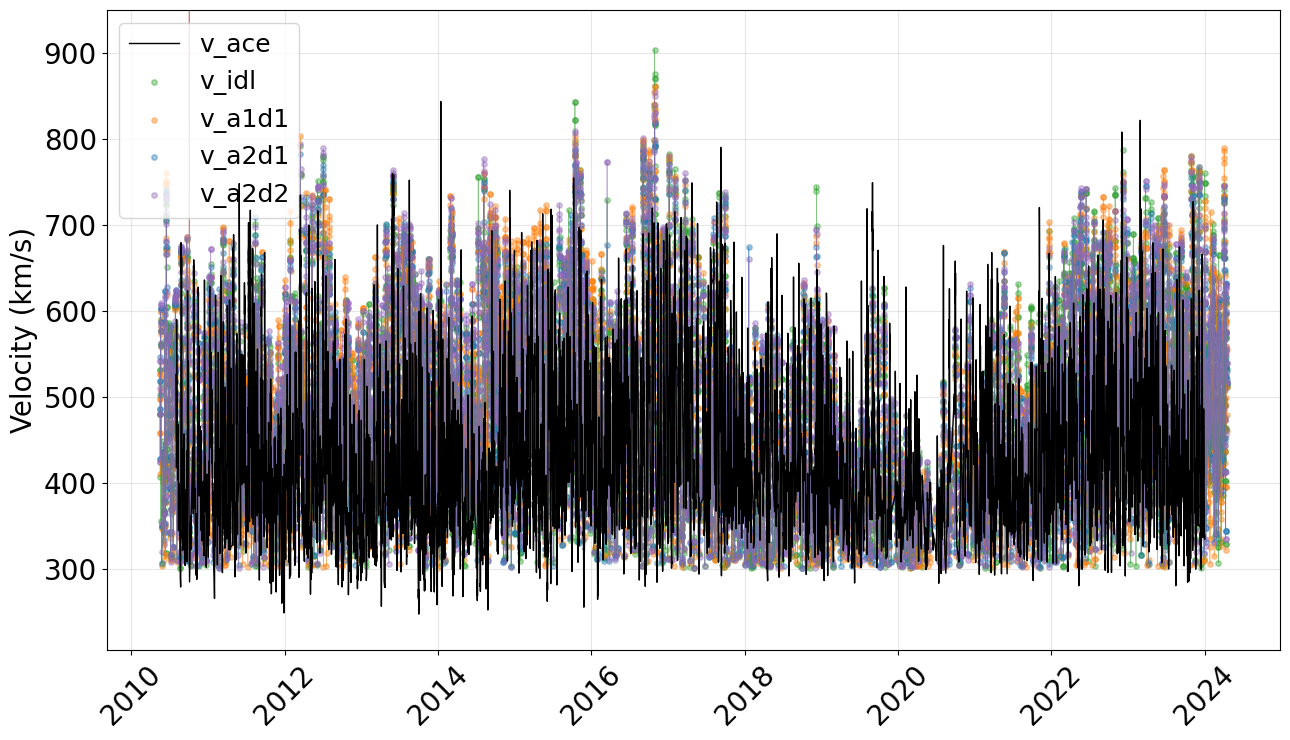

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare df for plotting (convert index, sort, and slice)
df_plot = df.copy()
df_plot.index = pd.to_datetime(df_plot.index)
df_plot = df_plot.sort_index()

# Limit to data range present in dataframe
start_date = df_plot.index.min()
end_date = df_plot.index.max()

# Color palette from Stats.ipynb
palette = sns.color_palette("tab10", 10)
colors = {
    "v_ace_at_earth": "black",
    "v_idl": palette[2],  # green
    "v_a1d1": palette[1],  # orange
    "v_a2d1": palette[0],  # blue
    "v_a2d2": palette[4],  # purple
}

# Create plot
fig, ax = plt.subplots(figsize=(13, 7.5))

# Plot v_ace as black line
if "v_ace_at_earth" in df_plot.columns:
    v_ace_clean = df_plot["v_ace_at_earth"].dropna()
    ax.plot(
        v_ace_clean.index,
        v_ace_clean,
        linewidth=1,
        color="black",
        label="v_ace",
        zorder=10,
    )

# Plot model velocities as colored lines + scatter
for col in ["v_idl", "v_a1d1", "v_a2d1", "v_a2d2"]:
    if col in df_plot.columns:
        col_clean = df_plot[col].dropna()
        color = colors.get(col, "gray")
        ax.plot(col_clean.index, col_clean, linewidth=0.5, alpha=0.6, color=color)
        ax.scatter(df_plot.index, df_plot[col], alpha=0.4, s=15, color=color, label=col)

# # ====================================================
# # ICME windows (red rectangles) - only in plot range
# # ====================================================
# for _, row in icme_df.iterrows():
#     if pd.isna(row["start"]) or pd.isna(row["end"]):
#         continue
#     # Only plot if ICME overlaps with plot time range
#     if row["start"] <= end_date and row["end"] >= start_date:
#         ax.axvspan(row["start"], row["end"], color="red", alpha=0.08, zorder=-5)

ax.set_ylabel("Velocity (km/s)", fontsize=20)
ax.tick_params(axis="both", labelsize=20)
ax.legend(loc="best", fontsize=18)
ax.grid(True, alpha=0.3)
ax.set_ylim(top=950)
plt.xticks(rotation=45, fontsize=20)
plt.tight_layout()
plt.show()
